# Observed VS Actual Tips In NYC Taxi and Limousine Data
## A Case Study In Linear Regression and Measurement Bias

### Overview
  The NYC Taxi and Limousine Comission (TLC) tracks data, such as pickup/dropoff
time, trip_distance, pickup/dropoff location, associated trip costs, and tips.
A regression analysis was conducted to predict driver tip amounts, in order to
determine possible interventions to improve driver tips with minimal opportunity
cost. Multiple linear regression on tip amounts against the strongest correlated
predictors revealed a moderately effective predictive model, which included:
payment type (categorically coded by NYC TLC prior to this project), tolls amount, and trip distance. While the model suggested tips paid by credit card tended to be greater than those with cash, further assessment revealed cash tips to not be appropriately tracked in the data set by TLC, resulting in significant model bias.

### Data

- Source: NYC Taxi and Limousine Comission
- Time Period Not Specified
- Key Variables Used: trip_distance, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount
- payment_type encoded as: 1 = credit card, 2 = cash, 3 = no charge, 4 = dispute

### Initial Question
This analysis was conducted to determine possible interventions to increase average tips for drivers with minimal opportunity cost, while adhering to ethical practice.

### Multiple Linear Regression Model (OLS)
- The data table was cleaned to remove variables which provided minimal utility and remove potential empty/duplicate data points.
- Pairplots and correlation tables were generated to assess which variables could be candidates for a model.
- Predictors: trip_distance, payment_type, tolls_amount
- Outcome: tip_amount
- This model type was selected due to tips being continuous and easily quantifiable. This model can account for a categorical variable, such as payment_type, which is of particular interest due to it being influenceable through TLC policy.
- Prior to model fitting, outliers were removed from outcome and predictor variables.


### Results
- OLS regression suggested tips trend lower from cash paying customers in a moderately effective model, in agreement with effect size from a mean assessment of tip amounts between credit card and cash payments.
- Plotting of residuals confirmed normal distribution.
- Plotting to assess homoscedasticity revealed effects of zero-inflation due to tips having a boundary at zero.

### Validation
- Further analysis revealed that tips from cash transactions appear to not be tracked in this data set.
- Compelling evidence of this was obtained by reconstructing a total trip amount with monetary data in this data set and comparing to the reported total_amount, with all difference values between the reported total and reconstructed total returning as 0$ for the cash payment type.

### Implications
The included predictors may indeed be useful for a model which estimates tips for drivers based on VIF assessment. However, the current model cannot provide accurate estimates, due to poorly recorded tipping data. Modificatons to tip tracking, as well as tip-category assignment are required in order to improve model validity. If a meaningful difference in tipping amounts between payment types is true, organizational policy could be used to develop a means to incentivize the payment type which results in generally greater tips, at a minimal cost.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from matplotlib.pyplot import subplots

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [ ]:
df0.head(5)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [ ]:
df0.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0


In [ ]:
df0.duplicated().sum()

np.int64(0)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           22699 non-null  int64  
 1   Unnamed: 0             22699 non-null  int64  
 2   VendorID               22699 non-null  int64  
 3   tpep_pickup_datetime   22699 non-null  object 
 4   tpep_dropoff_datetime  22699 non-null  object 
 5   passenger_count        22699 non-null  int64  
 6   trip_distance          22699 non-null  float64
 7   RatecodeID             22699 non-null  int64  
 8   store_and_fwd_flag     22699 non-null  object 
 9   PULocationID           22699 non-null  int64  
 10  DOLocationID           22699 non-null  int64  
 11  payment_type           22699 non-null  int64  
 12  fare_amount            22699 non-null  float64
 13  extra                  22699 non-null  float64
 14  mta_tax                22699 non-null  float64
 15  ti

In [ ]:
df0.shape

(22699, 19)

In [ ]:
df0['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,22600
Y,99


In [ ]:
df1 = df0.drop(['VendorID', 'store_and_fwd_flag'], axis=1)

In [ ]:
df1.info()

In [ ]:
df1.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
df1['pickup'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['dropoff'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [ ]:
df1.info()

In [ ]:
df1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
df1.head(5)

In [ ]:
df1 = df1.drop('RatecodeID', axis = 1)

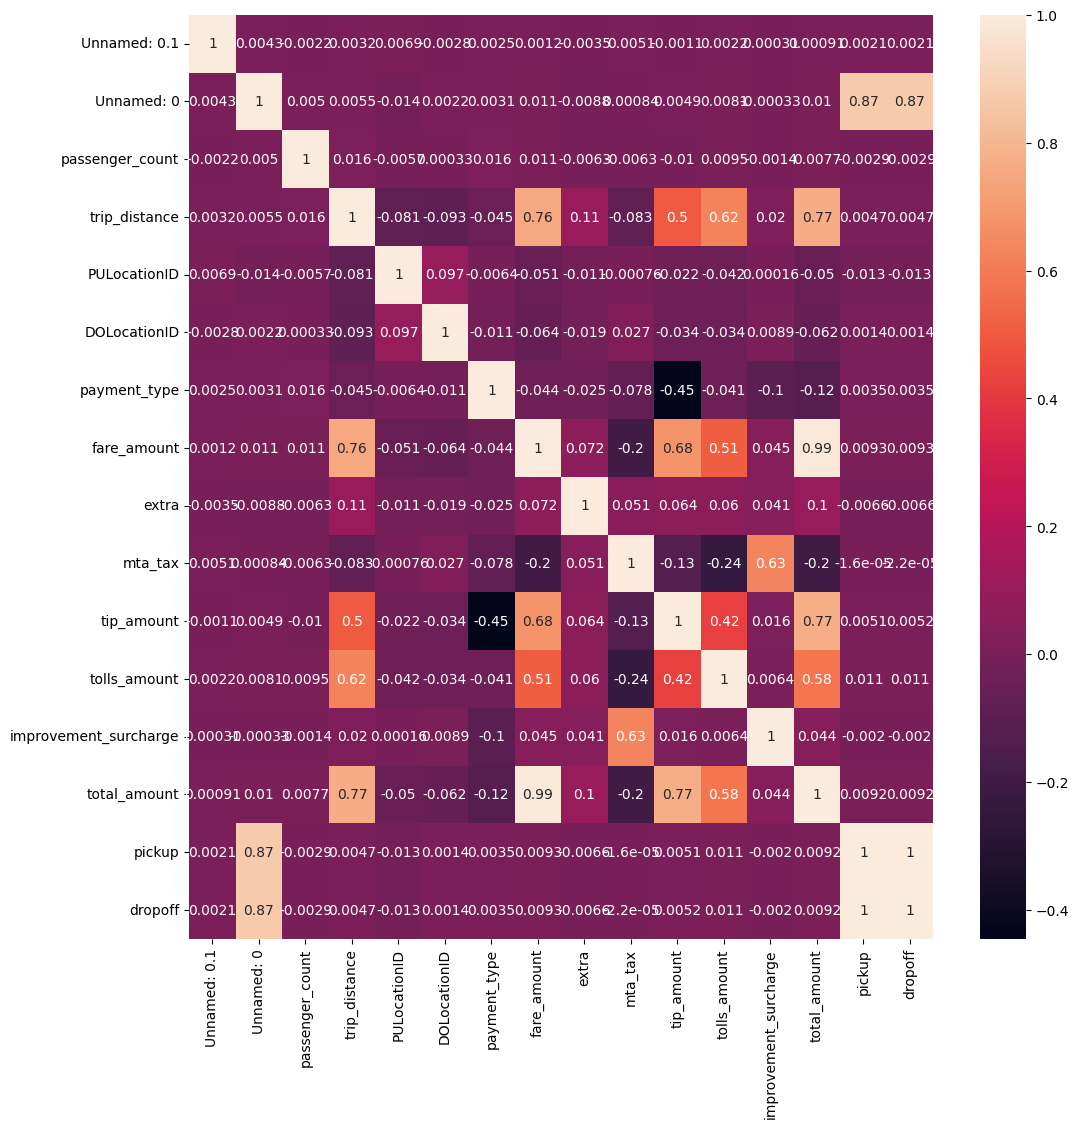

CPU times: user 700 ms, sys: 27 ms, total: 727 ms
Wall time: 729 ms


In [ ]:
%%time
plt.figure(figsize=(12, 12))
plt.subplots = sns.heatmap(df1.corr(), annot=True)
plt.show()

payment type category codes:
1 - credit card
2 - cash
3 - no charge
4 - dispute

In [ ]:
df1['payment_type'].value_counts()

,count
payment_type,
1,15265
2,7267
3,121
4,46


In [ ]:
df_dispute = df1[df1['payment_type'] == 4]
df_missing = df1[df1['payment_type'] == 3]

np.int64(0)

In [ ]:
df1.corr()

,Unnamed: 0.1,Unnamed: 0,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup,dropoff
Unnamed: 0.1,1.000000,0.004294,-0.002169,0.003191,0.006933,-0.002783,0.002482,0.001204,-0.003509,0.005136,-0.001134,0.002155,0.000313,0.000911,0.002066,0.002068
Unnamed: 0,0.004294,1.000000,0.004965,0.005466,-0.013753,0.002197,0.003094,0.010638,-0.008756,0.000844,0.004916,0.008104,-0.000331,0.010035,0.872616,0.872615
passenger_count,-0.002169,0.004965,1.000000,0.016496,-0.005721,0.000332,0.016178,0.010614,-0.006339,-0.006293,-0.009975,0.009532,-0.001418,0.007724,-0.002902,-0.002895
trip_distance,0.003191,0.005466,0.016496,1.000000,-0.080737,-0.093342,-0.044716,0.756599,0.110330,-0.083288,0.502242,0.622857,0.019569,0.767182,0.004659,0.004722
PULocationID,0.006933,-0.013753,-0.005721,-0.080737,1.000000,0.097142,-0.006449,-0.051474,-0.010923,-0.000755,-0.022284,-0.041886,0.000165,-0.050302,-0.013485,-0.013489
DOLocationID,-0.002783,0.002197,0.000332,-0.093342,0.097142,1.000000,-0.011300,-0.063840,-0.019478,0.027497,-0.034482,-0.033808,0.008885,-0.062068,0.001358,0.001353
payment_type,0.002482,0.003094,0.016178,-0.044716,-0.006449,-0.011300,1.000000,-0.043856,-0.024838,-0.077528,-0.445044,-0.041217,-0.101198,-0.118319,0.003455,0.003463
fare_amount,0.001204,0.010638,0.010614,0.756599,-0.051474,-0.063840,-0.043856,1.000000,0.071906,-0.196062,0.678835,0.513979,0.044962,0.987303,0.009286,0.009338
extra,-0.003509,-0.008756,-0.006339,0.110330,-0.010923,-0.019478,-0.024838,0.071906,1.000000,0.050816,0.064483,0.060402,0.040666,0.104406,-0.006570,-0.006559
mta_tax,0.005136,0.000844,-0.006293,-0.083288,-0.000755,0.027497,-0.077528,-0.196062,0.050816,1.000000,-0.126416,-0.238170,0.628518,-0.199457,-0.000016,-0.000022


In [ ]:
df2 = df1[(df1['payment_type'] != 3) & (df1['payment_type'] != 4)]

In [ ]:
df2['payment_type'].value_counts()

,count
payment_type,
1,15265
2,7267


In [ ]:
df2[['tip_amount','payment_type']].corr()

,tip_amount,payment_type
tip_amount,1.000000,-0.454675
payment_type,-0.454675,1.000000


In [ ]:
df2['tip_amount'].describe()

,tip_amount
count,22532.000000
mean,1.849388
std,2.806507
min,0.000000
25%,0.000000
50%,1.360000
75%,2.450000
max,200.000000


In [ ]:
q1 = df2['tip_amount'].quantile(0.25)
q3 = df2['tip_amount'].quantile(0.75)
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

In [ ]:
df2 = df2[(df2['tip_amount'] <= upper_bound) & (df2['tip_amount'] >= lower_bound)]

In [ ]:
df2['tip_amount'].describe()

,tip_amount
count,21346.000000
mean,1.398892
std,1.408236
min,0.000000
25%,0.000000
50%,1.250000
75%,2.160000
max,6.110000


In [ ]:
group_1 = df2[df2['payment_type'] == 1]
group_2 = df2[df2['payment_type'] == 2]

In [ ]:
payment_type_compare = stats.ttest_ind(group_1['tip_amount'], group_2['tip_amount'], equal_var = True)
payment_table = pd.DataFrame(payment_type_compare)
payment_table

,0
0,148.855414
1,0.000000


In [ ]:
def cohens_d(group_1, group_2):
    # Calculate means and standard deviations
    mean1, mean2 = np.mean(group_1), np.mean(group_2)
    std1, std2 = np.std(group_1, ddof=1), np.std(group_2, ddof=1) # use ddof=1 for sample std dev

    # Get sample sizes
    n1, n2 = len(group_1), len(group_2)

    # Calculate pooled standard deviation
    # This formula assumes equal variances (Student's t-test)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Calculate Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

In [ ]:
payment_type_es = cohens_d(group_1['tip_amount'], group_2['tip_amount'])
payment_type_es

np.float64(2.1501036782907907)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21346 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.1           21346 non-null  int64         
 1   Unnamed: 0             21346 non-null  int64         
 2   passenger_count        21346 non-null  int64         
 3   trip_distance          21346 non-null  float64       
 4   PULocationID           21346 non-null  int64         
 5   DOLocationID           21346 non-null  int64         
 6   payment_type           21346 non-null  int64         
 7   fare_amount            21346 non-null  float64       
 8   extra                  21346 non-null  float64       
 9   mta_tax                21346 non-null  float64       
 10  tip_amount             21346 non-null  float64       
 11  tolls_amount           21346 non-null  float64       
 12  improvement_surcharge  21346 non-null  float64       
 13  total_

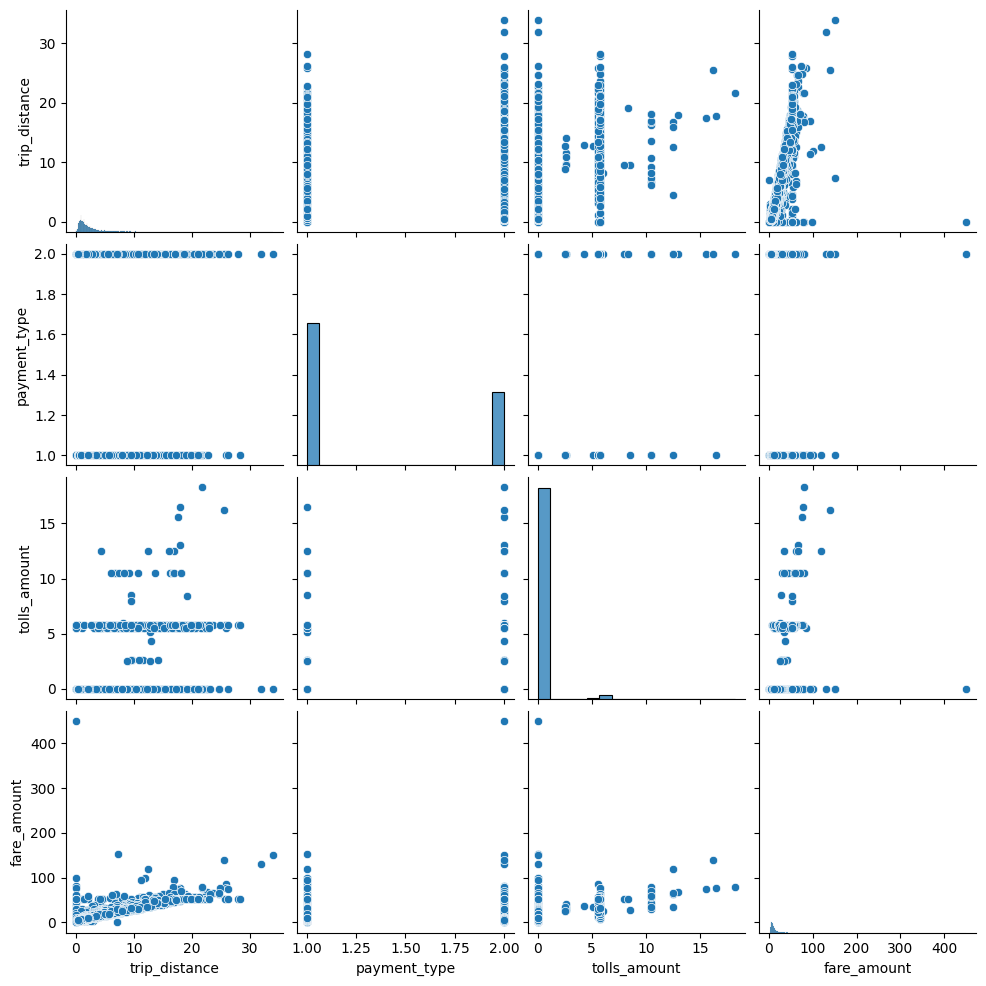

In [ ]:
sns.pairplot(df2[['trip_distance', 'payment_type', 'tolls_amount', 'fare_amount']])

exclude fare_amount, it appears fairly colinear with trip_distance and tolls_amount

In [ ]:
df2[['trip_distance','tolls_amount']].describe()

,trip_distance,tolls_amount
count,21346.000000,21346.000000
mean,2.403722,0.132551
std,2.738152,0.906751
min,0.000000,0.000000
25%,0.960000,0.000000
50%,1.550000,0.000000
75%,2.700000,0.000000
max,33.960000,18.280000


In [ ]:
df2 = df2[(df2['trip_distance'] <= upper_bound) & (df2['trip_distance'] >= lower_bound)]
df2 = df2[(df2['tolls_amount'] <= upper_bound) & (df2['tolls_amount'] >= lower_bound)]

In [ ]:
df2[['trip_distance','tolls_amount']].describe()

,trip_distance,tolls_amount
count,19900.000000,19900.000000
mean,1.817364,0.014017
std,1.242756,0.282183
min,0.000000,0.000000
25%,0.900000,0.000000
50%,1.460000,0.000000
75%,2.400000,0.000000
max,6.120000,5.760000


In [ ]:
ols_formula = 'tip_amount ~ trip_distance + tolls_amount + C(payment_type)'

In [ ]:
%%time
model = ols(formula=ols_formula, data=df2).fit()

CPU times: user 71.8 ms, sys: 1.31 ms, total: 73.1 ms
Wall time: 88.9 ms


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 1.220e+04
Date:                Fri, 19 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:47:18   Log-Likelihood:                -23118.
No. Observations:               19900   AIC:                         4.624e+04
Df Residuals:                   19896   BIC:                         4.628e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3665      0.011    128.240      0.000       1.346       1.387
C(payment_type)[T.2]    -1.9659      0.012   -168.351      0.000      -1.989      -1.943
trip_distance            0.3515      0.004     79.359      0.000       0.343       0.360
tolls_amount             0.0711      0.019      3.653      0.000       0.033       0.109
==============================================================================
Omnibus:                     1461.394   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6697.683
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                       5.811   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
if 'Intercept' in X.columns:
    X = X.drop('Intercept', axis=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,C(payment_type)[T.2],1.246589
1,trip_distance,1.253322
2,tolls_amount,1.006131


In [ ]:
residuals = model.resid

In [ ]:
predictions = model.predict()

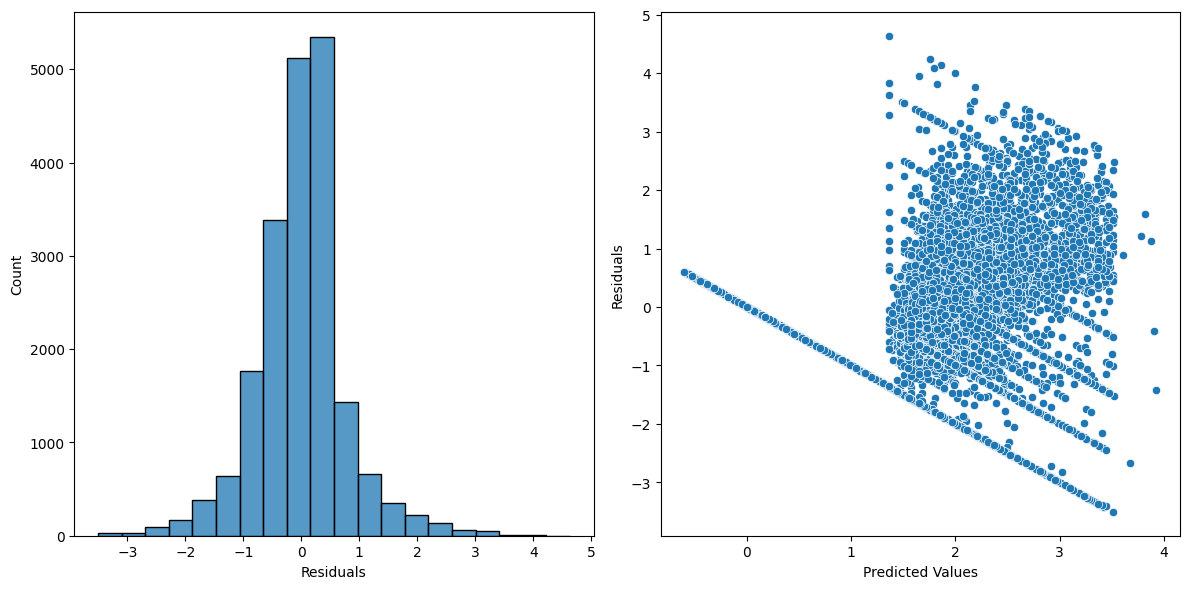

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals, bins=20, ax = ax[0])
ax[0].set_xlabel('Residuals')

sns.scatterplot(x=predictions, y=residuals, ax=ax[1])
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
model_robust = model.get_robustcov_results(cov_type="HC3")
model_robust.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 1.552e+04
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:46:05   Log-Likelihood:                -23118.
No. Observations:               19900   AIC:                         4.624e+04
Df Residuals:                   19896   BIC:                         4.628e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.3665      0.012    117.547      0.000       1.344       1.389
C(payment_type)[T.2]    -1.9659      0.009   -210.094      0.000      -1.984      -1.948
trip_distance            0.3515      0.006     54.111      0.000       0.339       0.364
tolls_amount             0.0711      0.041      1.738      0.082      -0.009       0.151
==============================================================================
Omnibus:                     1461.394   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6697.683
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                       5.811   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [ ]:
df2.head()

,Unnamed: 0.1,Unnamed: 0,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup,dropoff
0,0,24870114,6,3.34,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 08:55:43,2017-03-25 09:09:47
1,1,35634249,1,1.80,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 14:53:28,2017-04-11 15:19:58
2,2,106203690,1,1.00,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:26:56,2017-12-15 07:34:08
4,4,30841670,1,4.37,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:32:20,2017-04-15 23:49:03
5,5,23345809,6,2.30,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:34:11,2017-03-25 20:42:11


In [ ]:
df_credit = df2[df2['payment_type'] == 1]
df_cash = df2[df2['payment_type'] == 2]

In [ ]:
df_credit['payment_type'].value_counts()

,count
payment_type,
1,13323


In [ ]:
df_cash['payment_type'].value_counts()

,count
payment_type,
2,6577


<Axes: xlabel='tip_amount', ylabel='Count'>

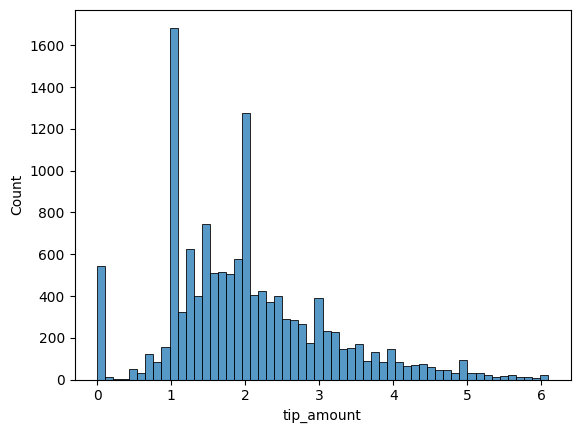

In [ ]:
sns.histplot(df_credit['tip_amount'], label='Credit Card')

<Axes: xlabel='tip_amount', ylabel='Count'>

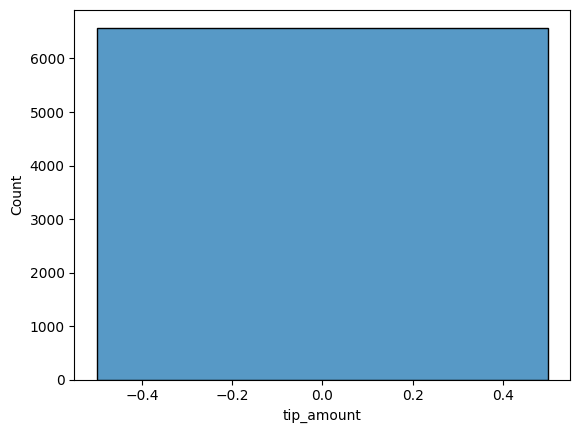

In [ ]:
sns.histplot(df_cash['tip_amount'], label='Cash')

In [ ]:
df_cash['tip_amount'].sort_values(ascending = False)

,tip_amount
22696,0.0
22632,0.0
22630,0.0
22626,0.0
22619,0.0
...,...
31,0.0
27,0.0
20,0.0
18,0.0


In [ ]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6577 entries, 4 to 22696
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.1           6577 non-null   int64         
 1   Unnamed: 0             6577 non-null   int64         
 2   passenger_count        6577 non-null   int64         
 3   trip_distance          6577 non-null   float64       
 4   PULocationID           6577 non-null   int64         
 5   DOLocationID           6577 non-null   int64         
 6   payment_type           6577 non-null   int64         
 7   fare_amount            6577 non-null   float64       
 8   extra                  6577 non-null   float64       
 9   mta_tax                6577 non-null   float64       
 10  tip_amount             6577 non-null   float64       
 11  tolls_amount           6577 non-null   float64       
 12  improvement_surcharge  6577 non-null   float64       
 13  total_a

In [ ]:
df_cash[['total_amount', 'tip_amount', 'tolls_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge']].head(20)

In [ ]:
df_cash['calculated_total'] = df_cash['tip_amount'] + df_cash['tolls_amount'] + df_cash['fare_amount'] + df_cash['extra'] + df_cash['mta_tax'] + df_cash['improvement_surcharge']

In [ ]:
df_cash[['total_amount', 'calculated_total']].head(20)

In [ ]:
df_cash['total_difference'] = df_cash['total_amount'] - df_cash['calculated_total']

In [ ]:
df_cash[['total_amount', 'calculated_total', 'total_difference']].head(20)

In [ ]:
(df_cash['total_difference'] > 0.01).sum()

np.int64(0)

In [ ]:
df_credit[['total_amount', 'tip_amount', 'tolls_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge']].head(20)

In [ ]:
!jupyter nbconvert --to html --embed-images /content/NYCTLC_project_outputs_cleared.ipynb

[NbConvertApp] Converting notebook /content/NYCTLC_project_outputs_cleared.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1033279 bytes to /content/NYCTLC_project_outputs_cleared.html
